In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage

In [3]:
def root_mean_square_error(x_interp, y_interp, function):
    return np.sqrt(1/len(x_interp) * np.sum(np.power((function(x_interp) - y_interp), 2)))

def mean_square_error(x_interp, y_interp, function):
    return np.multiply(1/len(x_interp), np.sum((function(x_interp) - y_interp)**2))

def mean_square_error_with_datapoints(x_interp, y_interp, y_datapoints):
    return np.multiply(1/x_interp, np.sum((y_datapoints[:len(y_datapoints)] - y_interp[:len(y_datapoints)])**2))

def mean_square_error_2D(original_data, tested_data):
    rows, cols = np.shape(tested_data)
    sum = 0
    for row in range(rows):
      sum += mean_square_error_with_datapoints(cols, original_data[row], tested_data[row])
    return sum

In [4]:
def convolution(data, kernel, kernel_size, step, padding = 0, matrix = 0):
    result = []
    for i in range(0, len(data) - kernel_size, step):
        temp = []
        for j in range(0, len(data[0]) - kernel_size, step):
            if (i < (len(data)) - 1 and j < len(data[0]) - 1):
                temp.append(kernel((data[i:i+kernel_size,j:j+kernel_size]), kernel_size, matrix))
        result.append(temp)
    return np.array(result)

def graysacling(data):
    result = []
    for i in range(0, len(data)):
      temp = []
      for j in range(0, len(data[0])):
        temp.append(0.299 * data[i][j][0] + 0.587 * data[i][j][1] + 0.114 * data[i][j][2])
      result.append(temp)
    return np.array(result)

# [from, to, step]
def potato_slicing_convolution(data, times_smaller):
  return [row[::times_smaller] for row in data[::times_smaller]]

In [5]:
def mean_kernel(data, matrix_size, matrix):
  sum = 0
  matrix = np.array([[1] * matrix_size] * matrix_size)
  for i in range(matrix_size):
    for j in range(matrix_size):
      sum += data[i][j] * matrix[i][j]
  return np.divide(sum, np.power(matrix_size, 2))

def edge_recognition_kernel_with_given_kernel(data, matrix_size, matrix):
  sum = 0
  for i in range(matrix_size):
    for j in range(matrix_size):
      sum += data[i][j] * matrix[i][j]
  return np.divide(sum, np.power(matrix_size, 2))


def convolution_for_demosaicing(data, kernel, kernel_size, matrix_r, matrix_g, matrix_b):
    step = 1
    result = []
    for i in range(0, len(data) - kernel_size, step):
        temp = []
        for j in range(0, len(data[0]) - kernel_size, step):
            if (i < (len(data)) - 1 and j < len(data[0]) - 1):
                temp.append(kernel((data[i:i+kernel_size,j:j+kernel_size]), kernel_size, matrix_r, matrix_g, matrix_b))
        result.append(temp)
    return np.array(result)

def demosaicing_kernel_with_given_kernel(data, matrix_size, matrix_r, matrix_g, matrix_b):
  sum = [0] * 3
  for i in range(matrix_size):
    for j in range(matrix_size):
      for k in range(matrix_size):
          sum[k] += data[i][j][k] * matrix_r[i][j]
          sum[k] += data[i][j][k] * matrix_g[i][j]
          sum[k] += data[i][j][k] * matrix_b[i][j]
  return np.array(sum)


def rgb_mean_kernel(data, matrix_size, matrix):
  sum = [0] * 3
  matrix = np.array([[[1] * 3] * matrix_size] * matrix_size)
  for i in range(matrix_size):
    for j in range(matrix_size):
      for k in range(3):
        sum[k] += data[i][j][k] * matrix[i][j][k]
  sum = np.divide(sum, np.power(matrix_size, 2))
  return np.array(sum,  dtype=np.int32)


In [6]:
circle_bayer = np.load("/content/drive/MyDrive/CFA_NPY/Bayer/circle.npy")
mond_bayer = np.load("/content/drive/MyDrive/CFA_NPY/Bayer/mond.npy")
milky_bayer = np.load("/content/drive/MyDrive/CFA_NPY/Bayer/milky-way.npy")
namib_bayer = np.load("/content/drive/MyDrive/CFA_NPY/Bayer/namib.npy")
pandas_bayer = np.load("/content/drive/MyDrive/CFA_NPY/Bayer/pandas.npy")

circle_fuji = np.load("/content/drive/MyDrive/CFA_NPY/Fuji/circle.npy")
mond_fuji = np.load("/content/drive/MyDrive/CFA_NPY/Fuji/mond.npy")
milky_fuji = np.load("/content/drive/MyDrive/CFA_NPY/Fuji/milky-way.npy")
namib_fuji = np.load("/content/drive/MyDrive/CFA_NPY/Fuji/namib.npy")
panda_fuji = np.load("/content/drive/MyDrive/CFA_NPY/Fuji/panda.npy")


In [7]:
camera_grayscale = skimage.data.camera()

astronaut_color = skimage.data.astronaut()

astronaut_grayscale = graysacling(astronaut_color)

In [21]:
edge_detection = np.array([[0, -1, 0], [-1, 4, -1],[0, -1, 0]])


sobel_feldman_y = np.array([[1, 2, 1], [0, 0, 0],[-1, -2, -1]])
sobel_feldman_x = np.transpose(sobel_feldman_y)

sobel_feldman_y_5 = np.array([[2, 2, 4, 2, 2], [1, 1, 2, 1, 1], [0, 0, 0, 0, 0], [-1, -1, -2, -1, -1], [-2, -2, -4, -2, -2]])
sobel_feldman_x_5 = np.transpose(sobel_feldman_y_5)


sharr_operator_x= np.array([[-3, 0, +3], [-10, 0, +10],[-3, 0, +3]])
sharr_operator_y =  np.transpose(sharr_operator_x)


prewitt_operator_0 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_operator_180 = np.transpose(prewitt_operator_0)
prewitt_operator_90 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_operator_270 = np.transpose(prewitt_operator_90)
prewitt_operator_45 = np.array([[-1,-1, 0], [-1, 0, 1], [0, 1, 1]])
prewitt_operator_225 = np.transpose(prewitt_operator_45)
prewitt_operator_135 = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]])
prewitt_operator_315 = np.transpose(prewitt_operator_135)

prewitt_operator_y_5 = np.array([[9, 9, 9, 9, 9], [9, 5, 5, 5, 9], [-7, -3, 0, -3, -7], [-7, -3, -3, -3, -7], [-7, -7, -7, -7, -7]])
prewitt_operator_x_5 = np.transpose(prewitt_operator_y_5)


gaussian_blur = 1/16 * np.array([[1, 2, 1], [1, 4, 1],[1, 2, 1]])

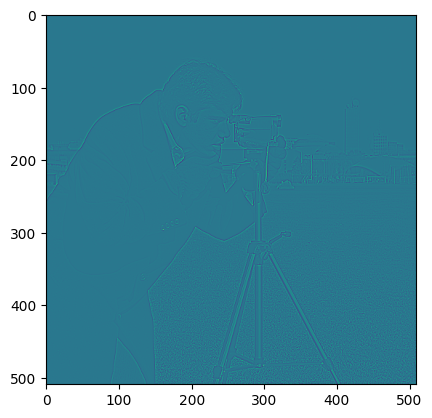

In [20]:
plt.imshow(convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, edge_detection))
plt.show()

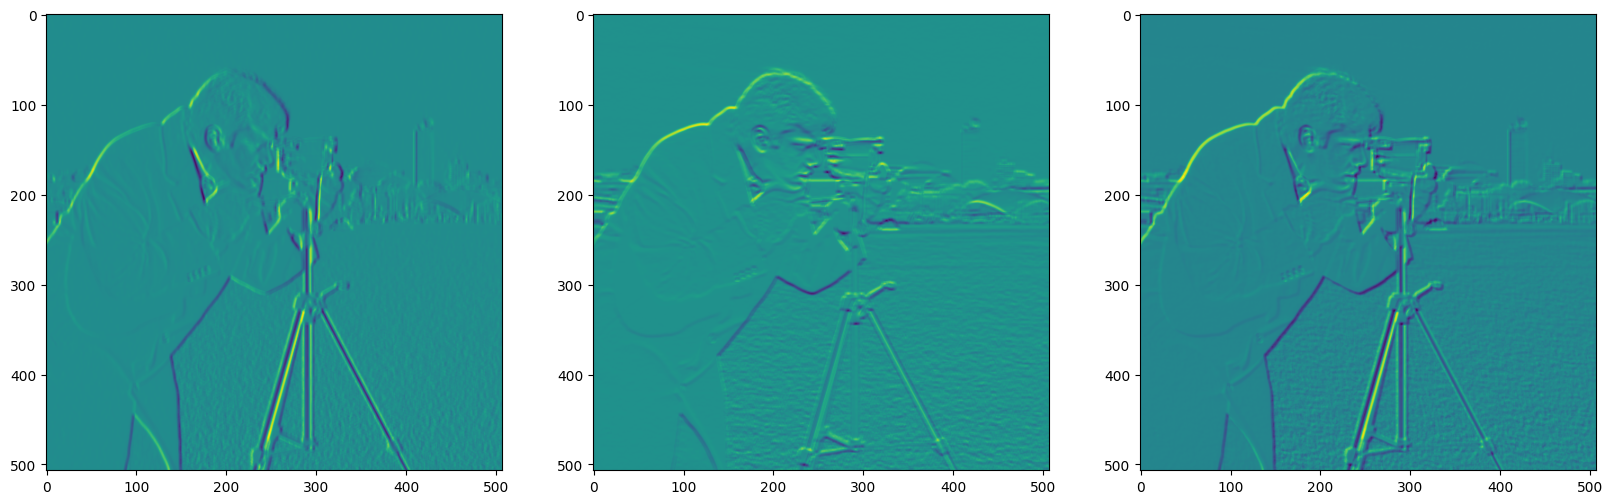

In [11]:
camera_grayscale_prewitt_operator_y_5 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 5, 1, 1, prewitt_operator_y_5)
camera_grayscale_prewitt_operator_x_5 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 5, 1, 1, prewitt_operator_x_5)
camera_grayscale_prewitt_operator_xy_5 = camera_grayscale_prewitt_operator_y_5 + camera_grayscale_prewitt_operator_x_5

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
ax[0].imshow(camera_grayscale_prewitt_operator_x_5)
ax[1].imshow(camera_grayscale_prewitt_operator_y_5)
ax[2].imshow(camera_grayscale_prewitt_operator_xy_5)
plt.show()

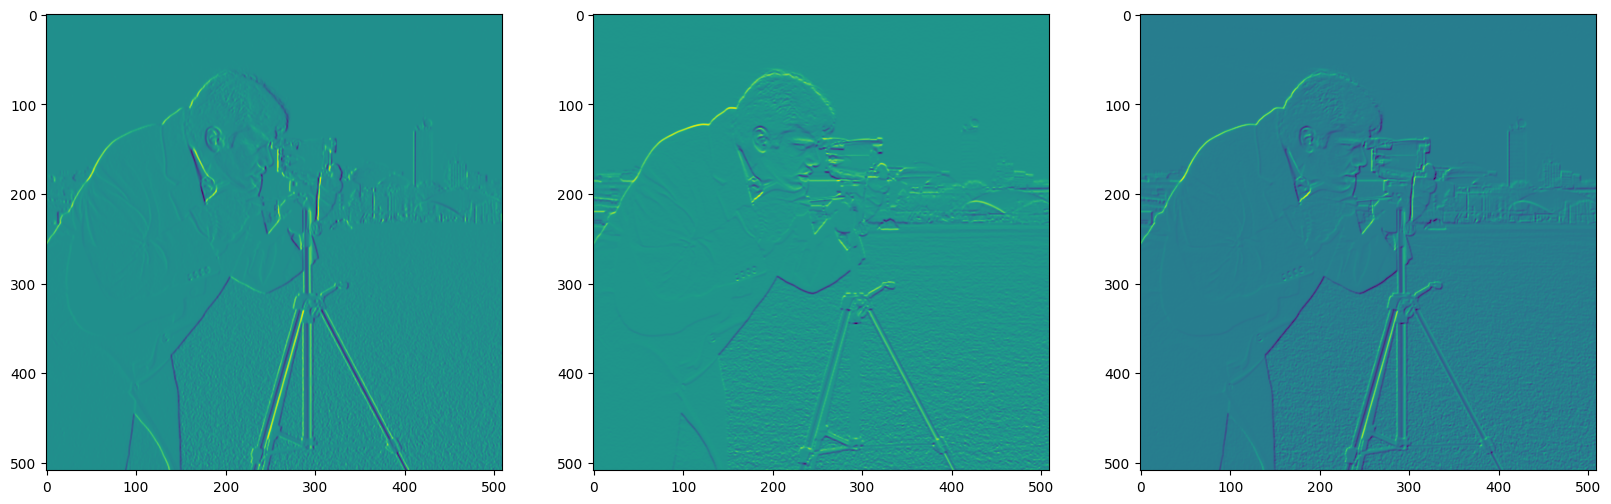

In [14]:
camera_grayscale_sobel_feldman_x = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, sobel_feldman_x)
camera_grayscale_sobel_feldman_y = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, sobel_feldman_y)
camera_grayscale_sobel_feldman_xy = camera_grayscale_sobel_feldman_x + camera_grayscale_sobel_feldman_y

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))
ax[0].imshow(camera_grayscale_sobel_feldman_x)
ax[1].imshow(camera_grayscale_sobel_feldman_y)
ax[2].imshow(camera_grayscale_sobel_feldman_xy)
plt.show()

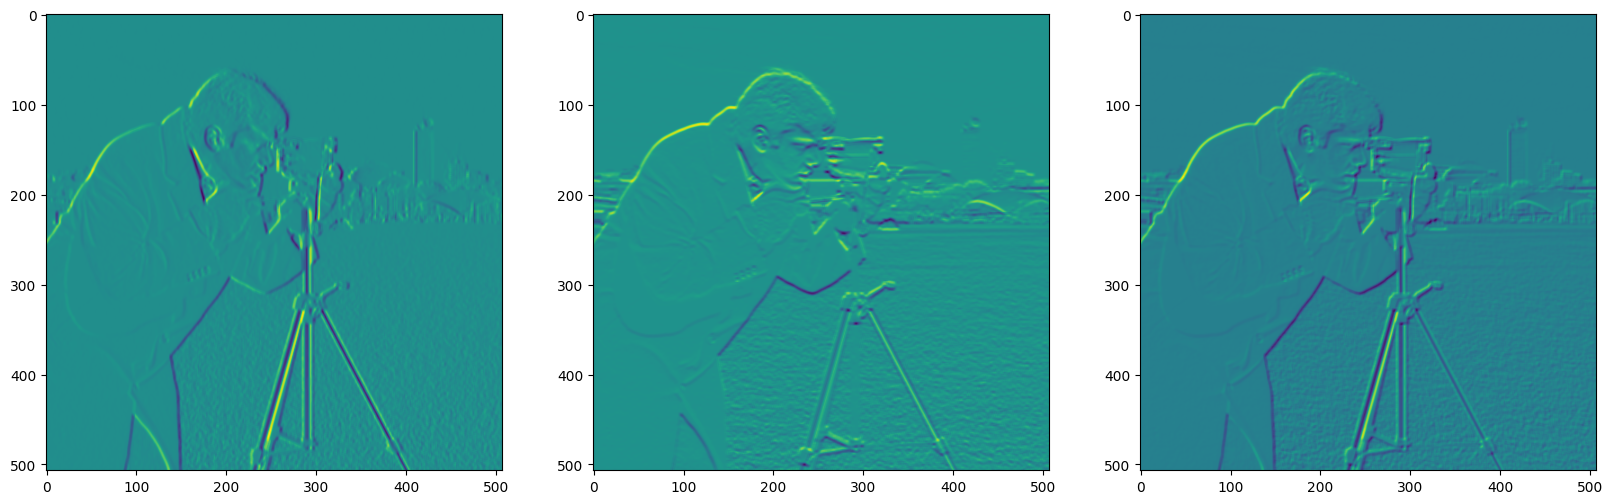

In [15]:
camera_grayscale_sobel_feldman_x_5 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 5, 1, 1, sobel_feldman_x_5)
camera_grayscale_sobel_feldman_y_5 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 5, 1, 1, sobel_feldman_y_5)
camera_grayscale_sobel_feldman_xy_5 = camera_grayscale_sobel_feldman_x_5 + camera_grayscale_sobel_feldman_y_5

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 10))

ax[0].imshow(camera_grayscale_sobel_feldman_x_5)
ax[1].imshow(camera_grayscale_sobel_feldman_y_5)
ax[2].imshow(camera_grayscale_sobel_feldman_xy_5)

plt.show()

In [16]:
camera_grayscale_prewitt_operator_0 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, prewitt_operator_0)

camera_grayscale_prewitt_operator_45 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, prewitt_operator_45)

camera_grayscale_prewitt_operator_90 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, prewitt_operator_90)

camera_grayscale_prewitt_operator_135 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, prewitt_operator_135)

camera_grayscale_prewitt_operator_180 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, prewitt_operator_180)

camera_grayscale_prewitt_operator_225 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, prewitt_operator_225)

camera_grayscale_prewitt_operator_270 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, prewitt_operator_270)

camera_grayscale_prewitt_operator_315 = convolution(camera_grayscale, edge_recognition_kernel_with_given_kernel, 3, 1, 1, prewitt_operator_315)

In [17]:
camera_grayscale_prewitt_operator_all = camera_grayscale_prewitt_operator_0 + camera_grayscale_prewitt_operator_45 + camera_grayscale_prewitt_operator_90 + camera_grayscale_prewitt_operator_135 + camera_grayscale_prewitt_operator_180 + camera_grayscale_prewitt_operator_225 + camera_grayscale_prewitt_operator_270 + camera_grayscale_prewitt_operator_315

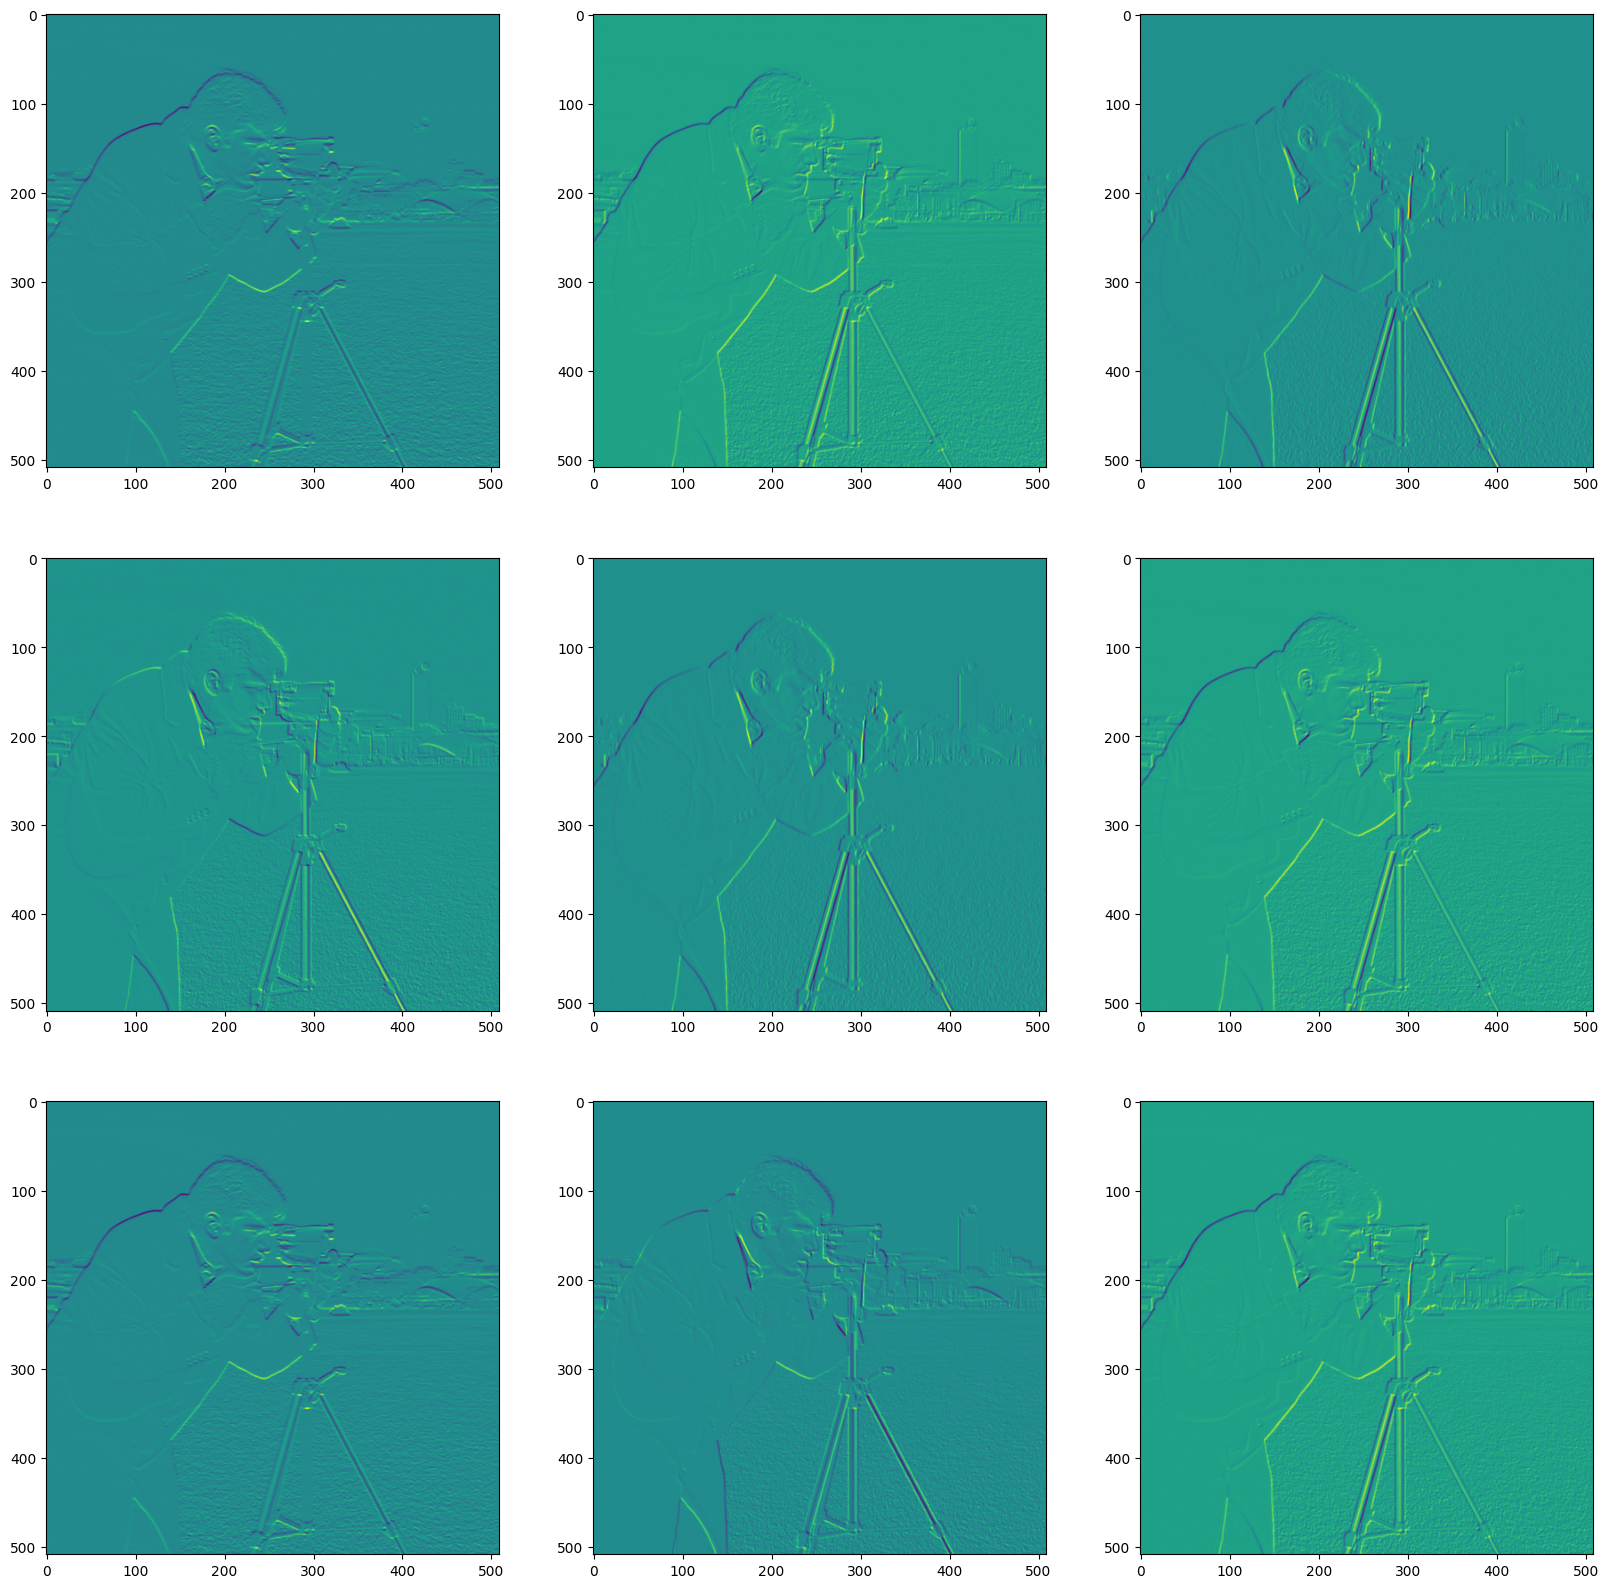

In [19]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 20))
ax[0, 0].imshow(camera_grayscale_prewitt_operator_0)
ax[0, 1].imshow(camera_grayscale_prewitt_operator_45)
ax[0, 2].imshow(camera_grayscale_prewitt_operator_90)
ax[1, 0].imshow(camera_grayscale_prewitt_operator_135)
ax[1, 1].imshow(camera_grayscale_prewitt_operator_180)
ax[1, 2].imshow(camera_grayscale_prewitt_operator_225)
ax[2, 0].imshow(camera_grayscale_prewitt_operator_270)
ax[2, 1].imshow(camera_grayscale_prewitt_operator_315)
ax[2, 2].imshow(camera_grayscale_prewitt_operator_all)
plt.show()

In [157]:
def convolution_for_demosaicing(data, kernel, kernel_size, matrix_r, matrix_g, matrix_b):
    step = 1
    result = []
    for i in range(0, len(data) - kernel_size, step):
        temp = []
        for j in range(0, len(data[0]) - kernel_size, step):
            if (i < (len(data)) - 1 and j < len(data[0]) - 1):
                temp.append(kernel((data[i:i+kernel_size,j:j+kernel_size]), kernel_size, matrix_r, matrix_g, matrix_b))
        result.append(temp)
    return np.array(result)

def demosaicing_kernel_with_given_kernel(data, matrix_size, matrix_red, matrix_green, matrix_blue):
  sum = [0, 0, 0]
  for i in range(matrix_size):
    for j in range(matrix_size):
      for k in range(3):
          sum[0] += data[i][j][k] * matrix_red[i][j]
          sum[1] += data[i][j][k] * matrix_green[i][j]
          sum[2] += data[i][j][k] * matrix_blue[i][j]


  return np.array(sum)

Bayer_green = np.array([[1/2, 0], [0, 1/2]])
Bayer_blue = np.array([[0, 0], [1, 0]])
Bayer_red = np.array([[0, 1], [0, 0]])

Fuji_green = np.array([[1/20, 0, 0, 1/20, 0, 0], [0, 1/20, 1/20, 0, 1/20, 1/20], [0, 1/20, 1/20, 0, 1/20, 1/20], [1/20, 0, 0, 1/20, 0, 0], [0, 1/20, 1/20, 0, 1/20, 1/20], [0, 1/20, 1/20, 0, 1/20, 1/20]])
Fuji_red = np.array([[0, 0, 1/8, 0, 0, 1/8], [1/8, 0, 0, 0, 0, 0], [0, 0, 0, 1/8, 0, 0], [0, 0, 1/8, 0, 0, 1/8], [1/8, 0, 0, 0, 0, 0], [0, 0, 0, 1/8, 0, 0]])
Fuji_blue = np.array([[0, 1/8, 0, 0, 1/8, 0], [0, 0, 0, 1/8, 0, 0], [1/8, 0, 0, 0, 0, 0], [0, 1/8, 0, 0, 1/8, 0], [0, 0, 0, 1/8, 0, 0], [1/8, 0, 0, 0, 0, 0]])

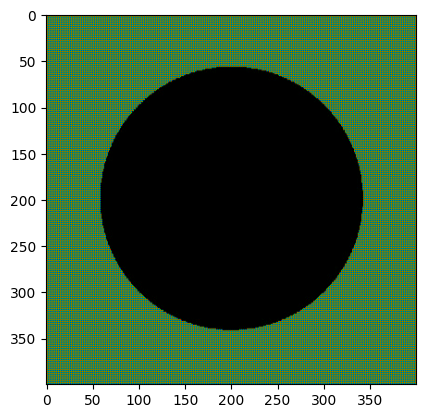

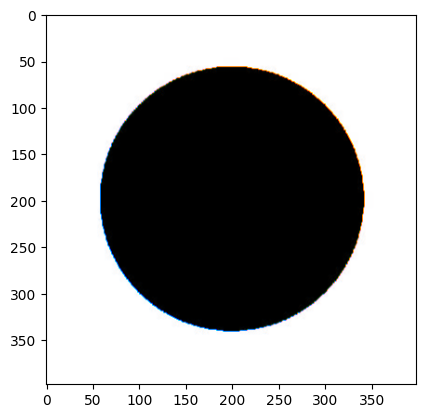

In [159]:
plt.imshow(circle_bayer)
plt.show()
plt.imshow(convolution_for_demosaicing(circle_bayer, demosaicing_kernel_with_given_kernel, 2, Bayer_red, Bayer_green, Bayer_blue))
plt.show()
# plt.imshow(convolution_for_demosaicing(circle_fuji, demosaicing_kernel_with_given_kernel, 6, Fuji_red, Fuji_green, Fuji_blue))
# plt.show()



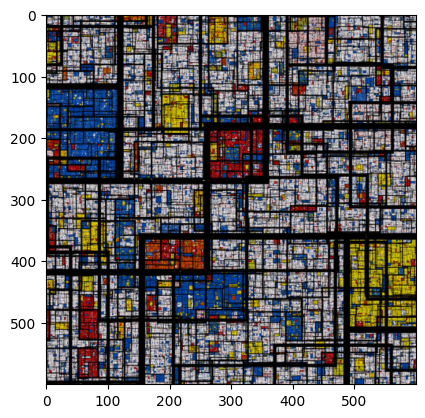

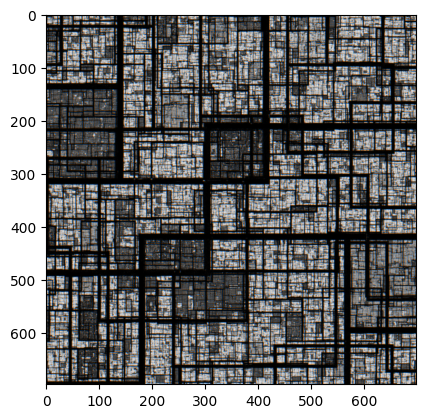

In [160]:
plt.imshow(mond_fuji)
plt.show()
plt.imshow(convolution_for_demosaicing(mond_bayer, demosaicing_kernel_with_given_kernel, 2, Bayer_red, Bayer_green, Bayer_blue))
plt.show()
# plt.imshow(convolution_for_demosaicing(mond_fuji, demosaicing_kernel_with_given_kernel, 6, Fuji_red, Fuji_green, Fuji_blue))
# plt.show()

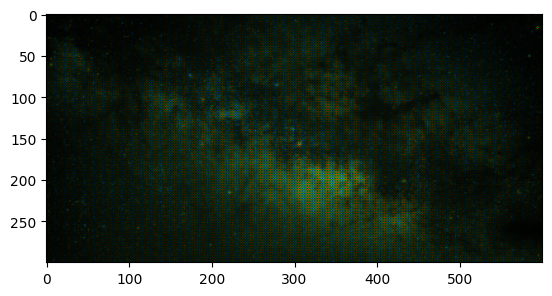

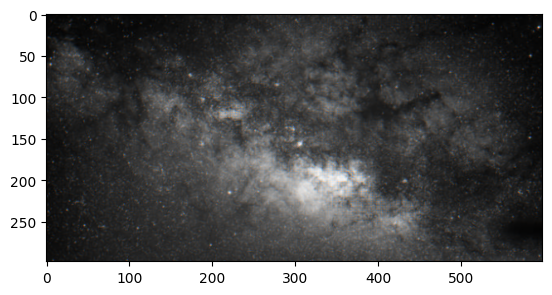

In [161]:
plt.imshow(milky_bayer)
plt.show()
plt.imshow(convolution_for_demosaicing(milky_bayer, demosaicing_kernel_with_given_kernel, 2, Bayer_red, Bayer_green, Bayer_blue))
plt.show()
# plt.imshow(convolution_for_demosaicing(milky_fuji, demosaicing_kernel_with_given_kernel, 6, Fuji_red, Fuji_green, Fuji_blue))
# plt.show()